In [6]:
import numpy as np
from spec_id import Median_w_Error_cont,Median_w_Error
from scipy.interpolate import interp1d, interp2d
from astropy.cosmology import Planck13 as cosmo
from astropy.io import ascii
from astropy.table import Table
import pandas as pd
import rpy2
import rpy2.robjects as robjects
R = robjects.r
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in", "ytick.direction": "in"})
colmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)

In [8]:
galDB = pd.read_pickle('../data/sgal_param_DB.pkl')
metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,6.1,.1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]

In [7]:
np.append(0,10**(np.array(tau[1:])-9))

NameError: name 'tau' is not defined

In [5]:
g_grid = np.zeros([metal.size,age.size,len(tau)])
for i in range(metal.size):
    g_grid[i]=np.load('../data/m%s_gbf.npy' % metal[i]).T

In [168]:
def SFH(AGE,TAU):
    return AGE*np.exp(-AGE/TAU)

def B_weight(dist,t_star):
    t_prime = np.append(np.arange(t_star-.001,.501,-.1),.501)
    idist = interp1d(age,dist)
    return idist(t_prime)

def Bottom_dist(Z,t_star,log_tau):
    return B_weight(g_grid[np.argwhere(metal == Z)[0][0]].T[np.argwhere(np.array(tau) == log_tau)[0][0]],t_star)\
           *SFH(np.arange(0.5,t_star+0.1,.1),10**(log_tau -9))

In [169]:
print Bottom_dist(metal[10],4.0,8.0)

[  7.75536474e-06   3.51623261e-06   1.55074796e-06   6.70588902e-07
   2.85855188e-07   1.20484350e-07   5.02885402e-08   2.08243349e-08
   8.56810990e-09   3.50549264e-09   1.42675050e-09   5.78064003e-10
   2.33387175e-10   9.40710062e-11   3.79206172e-11   1.53044546e-11
   6.18001393e-12   2.50003560e-12   1.01446285e-12   4.13249048e-13
   1.69508665e-13   7.01323824e-14   2.93380388e-14   1.23605528e-14
   5.20160466e-15   2.14233795e-15   8.60539785e-16   3.48215027e-16
   1.43602196e-16   6.03603625e-17   2.57590658e-17   1.11857512e-17
   4.95801949e-18   2.25948968e-18   1.06344231e-18   5.17440577e-19]


In [74]:
np.append(0.0001,np.arange(0.1,6-.4,.1))

array([  1.00000000e-04,   1.00000000e-01,   2.00000000e-01,
         3.00000000e-01,   4.00000000e-01,   5.00000000e-01,
         6.00000000e-01,   7.00000000e-01,   8.00000000e-01,
         9.00000000e-01,   1.00000000e+00,   1.10000000e+00,
         1.20000000e+00,   1.30000000e+00,   1.40000000e+00,
         1.50000000e+00,   1.60000000e+00,   1.70000000e+00,
         1.80000000e+00,   1.90000000e+00,   2.00000000e+00,
         2.10000000e+00,   2.20000000e+00,   2.30000000e+00,
         2.40000000e+00,   2.50000000e+00,   2.60000000e+00,
         2.70000000e+00,   2.80000000e+00,   2.90000000e+00,
         3.00000000e+00,   3.10000000e+00,   3.20000000e+00,
         3.30000000e+00,   3.40000000e+00,   3.50000000e+00,
         3.60000000e+00,   3.70000000e+00,   3.80000000e+00,
         3.90000000e+00,   4.00000000e+00,   4.10000000e+00,
         4.20000000e+00,   4.30000000e+00,   4.40000000e+00,
         4.50000000e+00,   4.60000000e+00,   4.70000000e+00,
         4.80000000e+00,

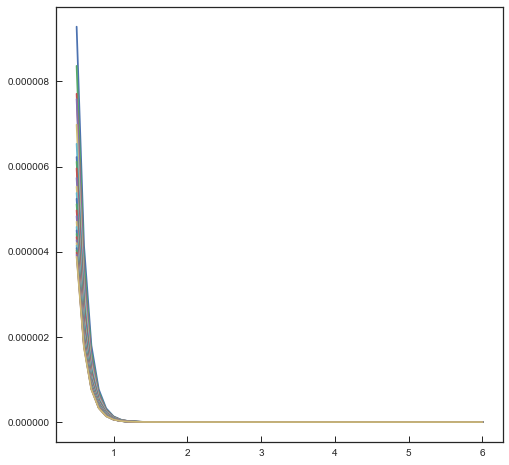

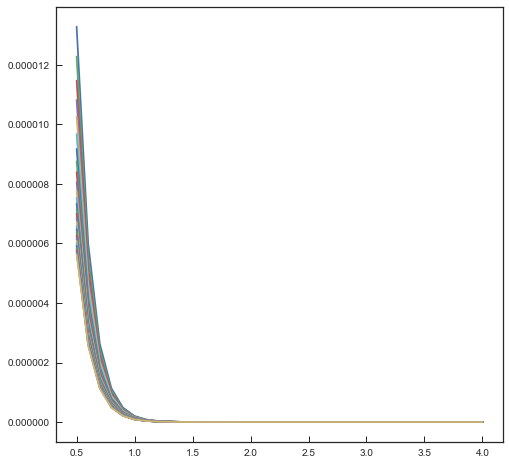

In [170]:
%matplotlib inline

# plt.figure(figsize=[8,8])
# plt.plot(age,SFH(age,.5))
# plt.show()
# plt.close()

plt.figure(figsize=[8,8])
for i in range(metal.size):
    plt.plot(age,B_weight(g_grid[i].T[1],6)*SFH(age,0.1))
plt.show()
plt.close()

plt.figure(figsize=[8,8])
for i in range(metal.size):
    plt.plot(np.arange(0.5,4.0+0.1,0.1),Bottom_dist(metal[i],4.0,8.0))
plt.show()
plt.close()

In [30]:
V,VL,VH=[[],[],[]]


for i in galDB.index:
    x,Px = np.load('../chidat/%s_dtau_Z_pos_lwa.npy' % galDB['gids'][i])
    v,vl,vh = Median_w_Error_cont(Px,x)
    V.append(v)
    VL.append(vl)
    VH.append(vh)

In [31]:
galDB['Zx_lwa'] = V
galDB['Zx_-_sig_lwa'] = VL
galDB['Zx_+_sig_lwa'] = VH

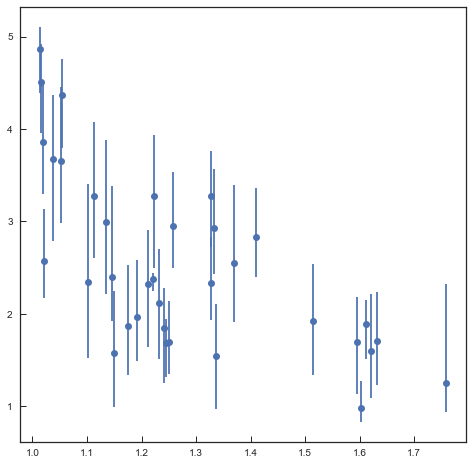

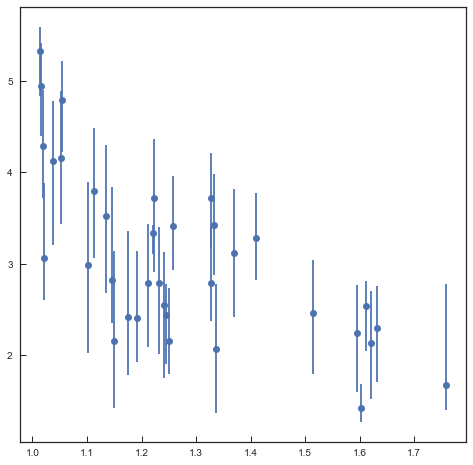

In [32]:
%matplotlib inline

plt.figure(figsize=[8,8])
plt.errorbar(galDB['hi_res_specz'],galDB['tx_lwa'],[galDB['tx_-_sig_lwa'],galDB['tx_+_sig_lwa']],fmt='o')
plt.show()
plt.close()

plt.figure(figsize=[8,8])
plt.errorbar(galDB['hi_res_specz'],galDB['tx_dt'],[galDB['tx_-_sig_dt'],galDB['tx_+_sig_dt']],fmt='o')
plt.show()
plt.close()

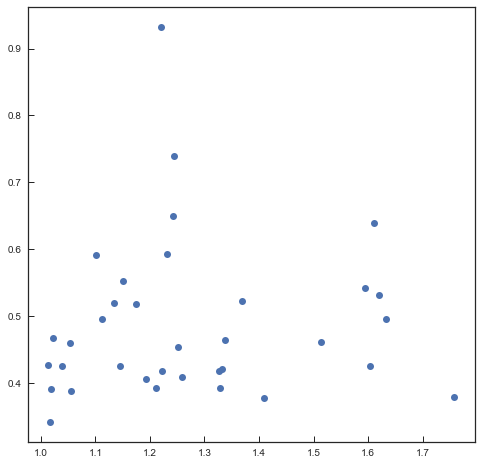

In [20]:
plt.figure(figsize=[8,8])
plt.plot(galDB['hi_res_specz'],galDB['tx_dt'] - V,'o')

In [33]:
galDB.to_pickle('../data/sgal_param_DB.pkl')